# PROBLEMA DO CAMINHO MÍNIMO

O Problema do Caminho Mínimo (_Shortest Path Problem_) consiste em encontrar em um grafo qual é o menor caminho existente entre dois vertices nesta rede, onde partimos de um vértice origem $1$ e chegamos em uma vértice destino $n$ e cada uma das arestas possuem um custo $d_{ij}$ de viajar do vértice $i$ para o vértice $j$. Caso não exista uma aresta para um dado par de vértices, então $d_{ij}=\infty$. Um exemplo prático deste problema é, por exemplo, encontrar a menor rota possível entre duas cidades. A modelagem deste problema pode ser feito em programação linear e pode ser dada como:

$$
\text{Min } z = \sum_{i=1}^{n} \sum_{j=1}^{n} d_{ij}x_{ij}\\
$$

$$
\begin{equation}
  \begin{array}{rlll}
    \text{Sujeito a: } & & & \\
    & \sum_{j=2}^{n} x_{1j} = 1   & & (1) \\
    & \sum_{i=1}^{n-1} x_{in} = 1 & & (2) \\
    & \sum_{j=2}^{n-1} x_{ji} = \sum_{j=2}^{n-1} x_{ij} & , \forall \ i=2,...,n-1 & (3) \\
    & x_{ij} \in \{0,1\} & , \forall \ i,j=1,...,n & (4)
  \end{array}
\end{equation}
$$

Onde:

- $x_{ij}$ nos diz se a rota da cidade $i$ para a cidade $j$ pertence à menor rota entre as cidades $1$ e $n$;
- $c_{ij}$ é o custo de viajar da cidade $i$ à cidade $j$;
- A restrição $(1)$ garante que apenas uma das rotas que saem da cidade 1 seja escolhida;
- A restrição $(2)$ garante que apenas uma das rotas que chega na cidade destino $n$ seja escolhida;
- O conjunto de restrições $(3)$ define que a quantidade de rotas selecionadas que chegam na cidade intermediária $i$ seja igual à quantidade de rotas selecionadas que saem desta cidade;
- A restrição $(4)$ garante a binaridade dos $x_{ij}$.

# Instância do Problema

> Um fornecedor de embalagens localizado em Osasco entrega seus produtos semanalmente para uma fábrica de refrigerantes localizada na região da Vila Formosa, em São Paulo. Para efetuar esta tarefa, o motorista pode optar por escolher diversos caminhos, passando por diferentes bairros em São Paulo. A Figura a seguir apresenta os possíveis caminhos que o veículo pode percorrer, do nó de oferta (Osasco) para o nó ou bairros. Formule o problema que mostre qual será o caminho mais curto a ser percorrido.

<center>

![exemplo_caminho_minimo.png](https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Operations-Research-with-Python/assets/exemplo-caminho-minimo.png)

Fonte: [Aula 16 - Caminho Mínimo ou Rota Mais Curta](https://www.youtube.com/watch?v=i5C82JDEMko)

</center>

---

Destarte, a formulação deste deste problema como uma instância do Problema de Designação pode ser dado como:

$$
\text{Min } z = 11x_{12} + 9x_{13} + 4x_{24} + 8x_{25} + 8x_{34} + 6x_{35} + 6x_{46} + 5x_{47} + 6x_{57} + 4x_{58} + 6x_{69} + 4x_{79} + 6x_{89}\\
$$

$$
\begin{equation}
  \begin{array}{rrcll}
    \text{Sujeito a: } & & & & \\
    & x_{12} + x_{13} & = & 1 & \text{(Nó 1 $\rightarrow$ Osasco)} \\
    & x_{69} + x_{79} + x_{89} & = & 1 & \text{(Nó 9 $\rightarrow$ Vila Formosa)} \\
    & x_{12} & = & x_{24} + x_{25} & \text{(Nó 2 $\rightarrow$ Lapa)} \\
    & x_{13} & = & x_{34} + x_{35} & \text{(Nó 3 $\rightarrow$ Alto de Pinheiros)} \\
    & x_{24} + x_{34} & = & x_{46} + x_{47} & \text{(Nó 4 $\rightarrow$ Sta. Cecília)} \\
    & x_{25} + x_{35} & = & x_{57} + x_{58} & \text{(Nó 5 $\rightarrow$ Jd. Paulista)} \\
    & x_{46} & = & x_{69} & \text{(Nó 6 $\rightarrow$ Belém)} \\
    & x_{47} + x_{57} & = & x_{79} & \text{(Nó 7 $\rightarrow$ Mooca)} \\
    & x_{58} & = & x_{89} & \text{(Nó 8 $\rightarrow$ Ipiranga)} \\
    & & & x \in \{0,1\} &
  \end{array}
\end{equation}
$$

Onde  $x_{ij}$ nos diz se a rota da cidade $i$ para a cidade $j$ pertence ao caminho mínimo entre as cidades $1$ e $n$.

# Modelando com Pyomo

Recomendações:
* Site [Pyomo.org](https://www.pyomo.org)
* Site [ND Pyomo Cookbook](https://jckantor.github.io/ND-Pyomo-Cookbook/)
* Vídeo [Noções básicas de Pyomo - Parte 1](https://www.youtube.com/watch?v=YDqalQH2b9w)
* Vídeo [Noções básicas de Pyomo - Parte 2](https://www.youtube.com/watch?v=nao-zTTUQPQ)

---

Caso não tenha instalado o Pyomo e o solver Gurobi na sua máquina, realize os seguintes passos:

- Baixe e instale o [Anaconda](https://www.anaconda.com/)
- Clique no ícone do Windows e pesquise por "Anaconda Prompt"
- Escreva no prompt `conda install -c conda-forge pyomo`
- Aguarde o término da instalação, e quando o prompt te perguntar `Proceed ([y]/n)?`, tecle "y"
- Agora escreva no prompt `conda install -c gurobi gurobi`
- Aguarde o término da instalação, e quando o prompt te perguntar `Proceed ([y]/n)?`, tecle "y"
- Pronto!

Para maiores detalhes, assista esse [vídeo](https://www.youtube.com/watch?v=lzMpvlKNQ-Y&t=294s).

---

Caso esteja no Google Colab, execute o bloco de códigos a seguir:

In [ ]:
#Execute esse bloco caso esteja executando no Google Colab
%pip install -q pyomo
%pip install -i https://pypi.gurobi.com gurobipy

Mas antes de mexermos com o Pyomo, é necessário entender dois conceitos que serão bastante utilizados ao manusear com essa biblioteca e que serão bastante úteis.

## Função ```lambda```

As funções anônimas no Python (isto é, funções que são criadas sem dar um nome a elas) são declaradas a partir da palavra reservada `lambda` (o porquê desse nome é um mistério para mim...). E, como acabamos de ver, as funções `lambda` são bastante úteis para criar rapidamente uma função que só vamos usar apenas para uma ocasião em específico (que no nosso caso, era passar funções como entradas para os parâmetros `initialize=` e `rule=` que existem em várias funções do Pyomo).

Ah, sim! Vale lembrar também que no Python é possível armazenar funções dentro de variáveis e passá-las também como valores para dentro de argumentos de outras funções (Quando funções recebem outras funções como parâmetros e realizam operações com elas, são chamadas de _Higher Order Functions_, isto é, Funções de Ordem Mais Alta).

Para exemplificar, vamos criar uma função anônima que calcular a área de um círculo de raio $r$ e vamos armazená-lo dentro de uma variável.

In [ ]:
# Modo tradicional de declarar funções em Python

def areaCirculo(r):
  area = 3.1415*r**2
  return area
print(f'Área (def): {areaCirculo(2)}')


# Agora declarando uma função anônima com lambda

area_circulo = lambda r: 3.1415*r**2
print(f'Área (lambda): {area_circulo(2)}')

Area def: 12.566
Area lambda: 12.566


A função `lambda`, neste caso, recebe como entrada o raio $r$ (as entradas são qualquer coisa entre a palavra `lambda` e o dois-pontos `:`, separados por vírgula caso haja mais de uma) e retorna uma expressão que corresponde ao valor da área do círculo (o retorno de uma função `lambda` é o que vem depois do `:` e só pode haver apenas uma saída).

Apesar das funções `lambda` serem bem úteis, elas são bem limitadas pelo fato de elas aceitarem apenas entradas e saída, não havendo possibilidade de escrever um escopo para a função. Portanto, em casos em que necessitemos escrever uma função que exigirá mais do que uma linha de código que não seja para retorna um valor, será necessário definir a função usando o tradicional `def`.

Por isso, sempre use o `lambda` quando for necessário criar uma função simples e curta, que só necessite passar entradas para retornar um único valor, sem haver um maior tratamento e processamento dessas entradas.

## _List Comprehension_

O _List Comprehension_ se trata de uma forma mais fácil e rápida de criar listas utilizando o _inline_ `for` e o _inline_ `if` combinados. Por exemplo, se queremos criar rapidamente uma lista dos números pares positivos menores ou iguais a 100, da maneira tradicional, escrevemos:

In [ ]:
def lista_pares(n):
  pares = [] # Criamos uma lista vazia

  for i in range(n+1):
    if i%2 == 0:
      pares.append(i)

  return pares

print(lista_pares(100))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


Só nesta brincadeira já foram umas 7 linhas de código. Porém, existe um jeito bem mais simples de criar uma lista, que é justamente a sintaxe do _List Comprehension_, como é mostrado no código a seguir:

In [ ]:
def lc_pares(n):
  pares = [i for i in range(n+1) if i%2==0] # List Comprehension
  return pares

print(lc_pares(100))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


Neste caso, quando atribuímos uma lista para dentro da variável `pares`, estamos colocando uma regra dentro desta lista, que faz uso de um _inline_ `for` seguido de um _inline_ `if`, isto é, de um `for` e de um `if` que podem ser escritos em uma única linha, sem a necessidade de pular uma linha para criar um escopo reservado para essas estruturas de programação como usualmente é feito no modo tradicional. Essa regra pode ser lida da seguinte forma: "Crie uma lista em que seja inserida um elemento `i` para cada `i` pertencente ao intervalo `range(n+1)`, em que `i` satisfaz a condição `i%2==0`, ou seja, se `i` for par".

Desta forma, as linhas de código reduziram de 7 para 4, tornando o código mais enxuto. E se quisermos ir mais além, podemos ainda combinar _List Comprehension_ com a função `lambda` para deixar o código ainda mais enxuto.

In [ ]:
pares = lambda n: [i for i in range(n+1) if i%2==0]
print(pares(100))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


É ainda possível utilizar o _inline_ `for` e o _inline_ `if` dentro de algumas funções nativas do Python, como o `sum()`, por exemplo. Imaginemos que queremos fazer a soma dos $n$ primeiros números ímpares. No método tradicional, conseguiriamos atingir esse objetivo com o seguinte código:

In [ ]:
def somar_impares(n):
  soma = 0

  for i in range(2*n+1):
    if i%2==1:
      soma += i

  return soma

print(somar_impares(10))

100


Agora utilizando o _inline_ `for` e o _inline_ `if`, teríamos:

In [ ]:
soma_imp = lambda n: sum(i for i in range(2*n+1) if i%2==1)
print(soma_imp(10))

100


CURIOSIDADE: A soma dos $n$ primeiros números ímpares é sempre igual a $n^2$. Faça um teste com o código acima para verificar se isso é válido para outros valores de `n`.

## Resolução com Pyomo

Vamos considerar uma matriz de-para em que a distância $d_{ij}$ representa a distância a ser percorrida da cidade $i$ para a cidade $j$. Caso não seja considerado que haja uma rota para ir da cidade $i$ para $j$, então $d_{ij}=0$.

In [ ]:
# Matriz DE-PARA das distâncias entre as cidades do problema:

#               1   2   3   4   5   6   7   8   9
distancias = [[ 0, 11,  9,  0,  0,  0,  0,  0,  0], # 1
              [ 0,  0,  0,  4,  8,  0,  0,  0,  0], # 2
              [ 0,  0,  0,  8,  6,  0,  0,  0,  0], # 3
              [ 0,  0,  0,  0,  0,  6,  5,  0,  0], # 4
              [ 0,  0,  0,  0,  0,  0,  6,  4,  0], # 5
              [ 0,  0,  0,  0,  0,  0,  0,  0,  6], # 6
              [ 0,  0,  0,  0,  0,  0,  0,  0,  4], # 7
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0], # 8
              [ 0,  0,  0,  0,  0,  0,  0,  0,  0]] # 9

Pelo fato de o Caminho Mínimo se tratar de problema de minimização, o modelo que vai ser construido pode acabar selecionando as varíveis que contenham uma respectiva distância nula, o que é algo que não desejamos que o modelo faça, uma vez que $d_{ij} = 0$ significa que não existe nenhum caminho que vai do nó $i$ para o nó $j$.

Para driblar este obstáculo, vamos encontrar a distância máxima que existe em na matriz $d$, multiplicá-la por um número razoavelmente alto (multiplicar por 100, por exemplo) e susbtituir os valores nulos por este custo alto, para que essas distâncias sejam tão altas que não haja preocupação de o modelo selecionar aquele caminho.

In [ ]:
# Encotrando a maior distância em "distancias"
maximo = max([max(linha) for linha in distancias])

# Substituindo as distâncias nulas por uma distância altíssima
distancias = [[n if n > 0 else 10*maximo for n in linha] for linha in distancias]
display(distancias)

[[110, 11, 9, 110, 110, 110, 110, 110, 110],
 [110, 110, 110, 4, 8, 110, 110, 110, 110],
 [110, 110, 110, 8, 6, 110, 110, 110, 110],
 [110, 110, 110, 110, 110, 6, 5, 110, 110],
 [110, 110, 110, 110, 110, 110, 6, 4, 110],
 [110, 110, 110, 110, 110, 110, 110, 110, 6],
 [110, 110, 110, 110, 110, 110, 110, 110, 4],
 [110, 110, 110, 110, 110, 110, 110, 110, 110],
 [110, 110, 110, 110, 110, 110, 110, 110, 110]]

Para a resolução do problema instanciado com o Pyomo, é possível criar uma função que importe a biblioteca do Pyomo, e resolva o Problema de Caminho Mínimo usando como parâmetros os dados fornecidos nos argumentos desta função, cujo código é mostrado como se segue:

In [ ]:
def caminho_minimo(distancias):

  import pyomo.environ as pyo  # Importando o Pyomo

  n = len(distancias)          # número de cidades
  modelo = pyo.ConcreteModel() # Criando uma instância do modelo
  modelo.I = pyo.RangeSet(n)   # Índice para as cidades
  modelo.J = pyo.RangeSet(n)   # Índice para as cidades
  I = modelo.I                 # "Renomeando" o intervalo I
  J = modelo.J                 # "Renomeando" o intervalo J
  
  # VARIÁVEIS DE DECISÃO
  # xij representa a decisão de tomar a rota que vai da cidade i para a j
  modelo.x = pyo.Var(I, J, within= pyo.Binary, initialize=0)
  x = modelo.x
  
  # PASSANDO OS PARÂMETROS DO PROBLEMA

  # Distâncias entre as cidades i e j
  modelo.d = pyo.Param(
      I, J, 
      initialize= lambda modelo, i, j: distancias[i-1][j-1]) # Função lambda
  d = modelo.d

  # FUNÇÃO OBJETIVO
  modelo.obj = pyo.Objective(
      rule= lambda modelo: \
            sum(x[i, j] * d[i, j] for i in I for j in J),
      sense= pyo.minimize
      ) 

  # RESTRIÇÕES

  # R1: O somatório das variáveis de decisão que saem do nó origem deve ser 1.
  modelo.R_Origem = pyo.Constraint(
      rule= lambda modelo, j: sum(x[1, j] for j in J) == 1
      )
  
  # R2: O somatório das variáveis de decisão que chegam no nó destino deve ser 1 também.
  modelo.R_Destino = pyo.Constraint(
      rule= lambda modelo, i: sum(x[i, n] for i in I) == 1
      )
  
  # R3: O somatório das variáveis que entram em um nó intermediário deve ser igual ao somatório que sai deste.
  modelo.R_Intermediario = pyo.Constraint(
      pyo.RangeSet(2, n-1),
      rule= lambda modelo, i: \
            sum(x[i, j] for j in J) == sum(x[j, i] for j in J)
      )

  # RESOLUÇÃO DO MODELO
  gurobi = pyo.SolverFactory('gurobi') # Construindo o solver gurobi
  resultado = gurobi.solve(modelo) # Armazenando o resultado

  # Se o status do resultado for 'ok', exibe as informações
  if str(resultado.Solver.status) == 'ok':
    
    # Imprimindo a função-objetiva
    registro = f'CAMINHO MÍNIMO\nz = {pyo.value(modelo.obj)}\n'

    # Imprimindo as variáveis de decisão selecionadas
    chaves = list(x.keys())
    registro += '\nVARIÁVEIS SELECIONADAS\n'
    for c in chaves:
      if pyo.value(x[c]) == 1:
        registro += f"x{c[0]}{c[1]}\n"

  else: # Se status não for 'ok'...
    
    registro = 'Nenhuma solução válida foi encontrada.'

  return registro

Cujo resultado encontrado será como dado a seguir:

In [ ]:
registro = caminho_minimo(distancias)
print(registro)

CAMINHO MÍNIMO
z = 24.0

VARIÁVEIS SELECIONADAS
x12
x24
x47
x79



# Resolvendo com NetworkX

A biblioteca NetworkX conta com as funções [`shortest_path()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path) e [`shortest_path_length`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html) para executar o algoritmo de Dijkistra e encontrar o caminho mínimo dentro de um grafo e o valor do seu comprimento, respectivamente. Para isso, é necessário construir o grafo do problema antes de executar o algoritmo.

In [ ]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from([
    (1, {'cidade': 'Osasco'}),
    (2, {'cidade': 'Lapa'}),
    (3, {'cidade': 'Alto de Pinheiros'}),
    (4, {'cidade': 'Santa Cecília'}),
    (5, {'cidade': 'Jardim Paulista'}),
    (6, {'cidade': 'Belém'}),
    (7, {'cidade': 'Mooca'}),
    (8, {'cidade': 'Ipiranga'}),
    (9, {'cidade': 'Vila Formosa'})
])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'distância' para cada aresta
G.add_edges_from([
    (1,  2, {'distância': 11}),
    (1,  3, {'distância':  9}),
    (2,  4, {'distância':  4}),
    (2,  5, {'distância':  8}),
    (3,  4, {'distância':  8}),
    (3,  5, {'distância':  6}),
    (4,  6, {'distância':  6}),
    (4,  7, {'distância':  5}),
    (5,  7, {'distância':  6}),
    (5,  8, {'distância':  4}),
    (6,  9, {'distância':  6}),
    (7,  9, {'distância':  4}),
    (8,  9, {'distância':  6})
])

# Calcula o Caminho Mínimo e retorna uma lista de nós
nos_cm = nx.shortest_path(
    G,
    source= 1,
    target= 9,
    weight= 'distância',
    method= 'dijkstra'
)

# Calcula o comprimento do Caminho Mínimo
comprimento_cm = nx.shortest_path_length(
    G,
    source= 1,
    target= 9,
    weight= 'distância',
    method= 'dijkstra'
)

## Desenhando o grafo

Antes de tudo, é necessário criar e guardar as posições dos nós em uma variável. Para isso foi utilizado a função [`planar_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html) e, logo depois, utilizou-se [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) para desenhar os grafos.

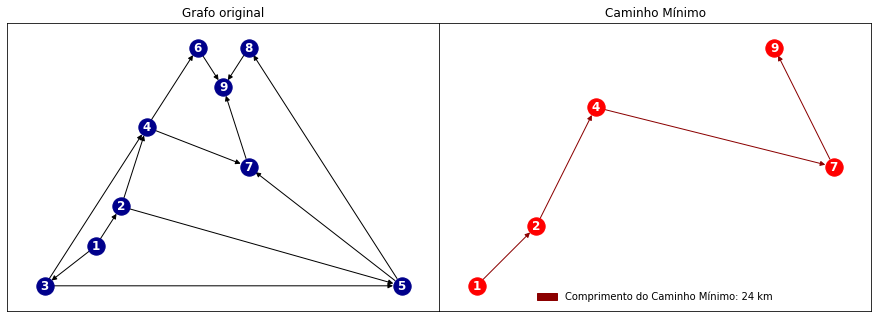

In [ ]:
import matplotlib.pyplot as plt

# Define o layout dos nós do grafo G para exibição
layout = nx.planar_layout(G)

# Desenhando o grafo original
nx.draw_networkx(
    G,                                # Grafo original
    ax=          plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'darkblue',          # Define a cor dos nós como azul escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
    )
plt.title('Grafo original') # Define o título do 1º grafo

# Criando um lista das arestas para posterior exibição
arestas_cm = []
for i in range(len(nos_cm)-1):
    no1 = nos_cm[i]
    no2 = nos_cm[i+1]
    arestas_cm.append((no1, no2))

# Desenhando o Caminho Mínimo
nx.draw_networkx(
    G,                                # Grafo original
    nodelist=    nos_cm,              # Exibe apenas os nós armazenados em nos_cm 
    edgelist=    arestas_cm,          # Exibe apenas as arestas armazenadas em arestas_cm
    ax=          plt.axes([1,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'red',               # Define a cor dos nós como vermelho
    edge_color=  'darkred',           # Define a cor das arestas como vermelho escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
)
plt.title('Caminho Mínimo') # Define o título do 2º grafo
plt.legend(
    labels=     [f"Comprimento do Caminho Mínimo: {comprimento_cm} km"],
    loc=        'lower center',
    framealpha= 0
)

# Exercício

Utilizando o que foi aprendido nesta aula, resolva o seguinte exercício modelando o problema no Pyomo, exibindo no fim qual o Caminho Mínimo encontrado. Depois, resolva novamente o problema utilizando o NetworkX, exibindo ao final o grafo original e o grafo da solução encontrada com o auxílio do Matplotlib, fazendo, destarte, uma comparação lado a lado dos dois grafos.

Obs.: Não se preocupe caso o caminho encontrado pelo Pyomo seja distinta do encontrado pelo NetworkX, desde que o custo mínimo encontrado usando ambas as bibliotecas sejam o mesmo.

> A figura a seguir fornece a rede de comunicação entre duas estações, 1 e 7. A probabilidade de um link na rede operar sem falhas é mostrada em cada arco. As mensagens são enviadas da estação 1 para a estação 7, e o objetivo é determinar a rota que maximiza a probabilidade de uma transmissão bem-sucedida. Formule a situação como um modelo de Caminho Mínimo e determine a solução ótima.

<center>

![exercicio_caminho_minimo.png](https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Operations-Research-with-Python/assets/exercicio-caminho-minimo.png)

Fonte: TAHA, Hamdy A. <b>Operations Research: An Introduction</b>. 10ª edição. Exercício 6-14, pág. 292.

</center>

### (a) Resolva utilizando Pyomo

In [ ]:
import pyomo.environ as pyo



### (b) Resolva utilizando NetworkX

In [ ]:
import networkx as nx



### (c) Apresente os grafos com Matplotlib

In [ ]:
import matplotlib.pyplot as plt

